# Stack Plots

Another common type of plot is an area or fill plot. An area plot typically is a way of displaying multiple timeseries that each represent a quantity. The contribution of each of the series is "stacked" on top of the other so that total across all components can be viewed clearly. Let's start with an example that you'll explore later as an exercise:

In [37]:
%config InlineBackend.figure_format = 'retina'

# Load the data
import pandas as pd

file = "data/poverty-dollars-a-day.csv"
poverty = pd.read_csv(file)
poverty.head(5)

,Year,$30 or more,$10-$30,$5-$10,$1.90-$5,$1.90 or less
0,1820,537628,7143444,29523314,169391904,794510917
1,1830,585831,8085936,33032595,181653002,851972581
2,1840,576336,9229552,37482730,188946658,889888153
3,1850,485850,10391368,42552653,197089462,921709511
4,1860,874791,14710723,49955096,206453158,918913757


In [38]:
# Prepare the data
columns = ["$1.90 or less", "$1.90-$5", "$5-$10", "$10-$30", "$30 or more"]
data = poverty[columns]

scaled_poverty = data.div(data.sum(axis=1), axis=0) * 100
scaled_poverty.head(5)

,$1.90 or less,$1.90-$5,$5-$10,$10-$30,$30 or more
0,79.363220,16.920456,2.949066,0.713554,0.053703
1,79.228946,16.892769,3.071857,0.751949,0.054479
2,79.022257,16.778503,3.328474,0.819586,0.051179
3,78.628803,16.813224,3.630064,0.886462,0.041447
4,77.160799,17.335784,4.194708,1.235253,0.073456


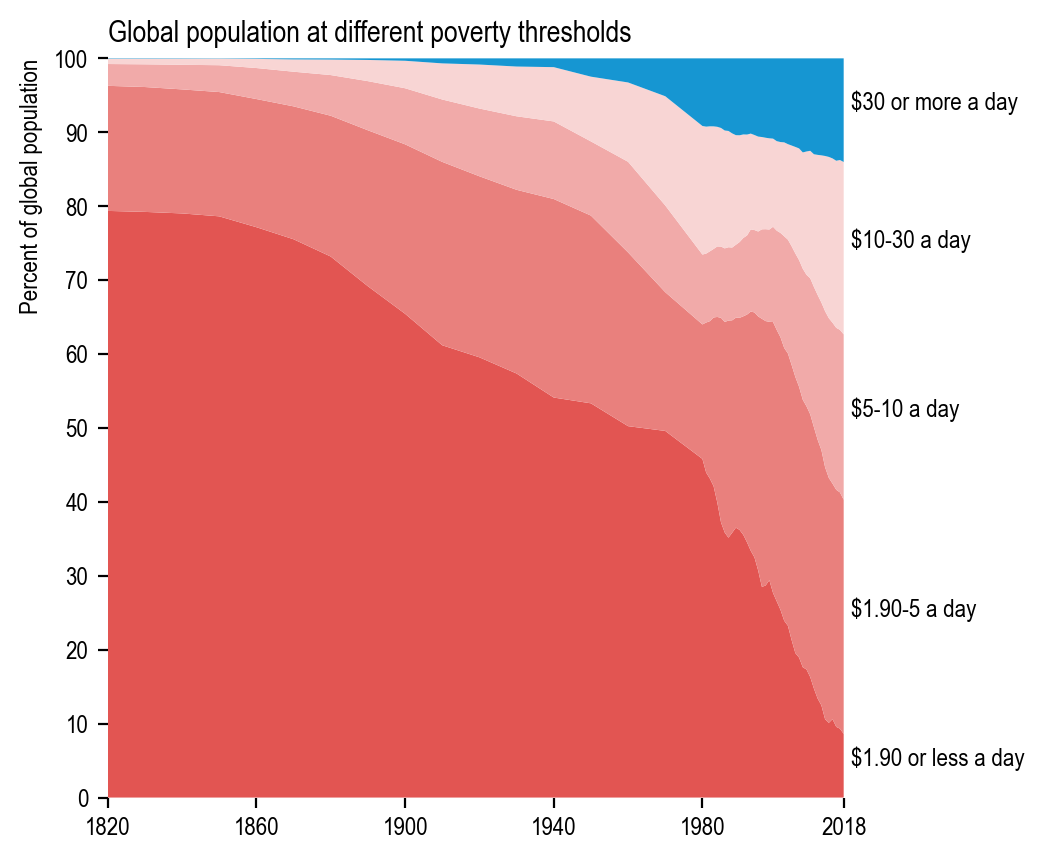

In [44]:
# Plot the data
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams["font.size"] = 9
mpl.rcParams["font.sans-serif"] = [
    "Arial Narrow",
    "DejaVu Sans",
    "Lucida Grande",
    "Verdana",
]

colors = ["#e25552", "#e9807d", "#f1aaa9", "#f8d5d4", "#1696d2"]

x = poverty["Year"].values
Y = scaled_poverty[columns].values.T
fig, ax = plt.subplots()
ax.stackplot(x, Y, colors=colors)
ax.set_xlim([min(x), max(x)])
ax.set_ylim([0, 100])
ax.set_xticks(np.append(np.arange(1820, 2018, 40), [2018]))
ax.set_yticks(np.arange(0, 101, 10))
ax.spines[:].set_visible(False)
ax.set_ylabel("Percent of global population", loc="top")
fig.subplots_adjust(right=0.7)
ax.set_title("Global population at different poverty thresholds", loc="left")

# Add labels to the side of the plot
poverty2018 = scaled_poverty.iloc[-1]
data = poverty2018.values
cum_data = np.concatenate(([0], np.cumsum(data)))
maxyear = x.max()
cum_data

# labels = ['\$1.90 or less a day','\$1.90-\$5 a day','\$5-\$10 a day','\$10-\$30 a day','\$30 or more a day']
labels = [
    r"$1.90 or less a day",
    r"$1.90-5 a day",
    r"$5-10 a day",
    r"$10-30 a day",
    r"$30 or more a day",
]
for i, label in enumerate(labels):
    ax.text(maxyear + 2, cum_data[i] + data[i] / 2, label)

## References

Poverty Data

Michalis Moatsos (2021) – with major processing by Our World in Data. “$1.90 a day - Number in poverty” [dataset]. Michalis Moatsos, “Global extreme poverty - Present and past since 1820” [original data]. [Link](https://ourworldindata.org/grapher/distribution-of-population-between-different-poverty-thresholds-historical)